###  Гузнов К. М. 17-АС ###
### Вариант 4.  (1/1,2)  ###
Цель лабораторной работы – получение навыков работы с методами регрессии.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

Кодировка классификаторов:
1 – линейная регрессия без использования регуляризаторов;
2 – линейная регрессия, LASSO регуляризатор;
3 – линейная регрессия, RIDGE регуляризатор;
 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr

**1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).**

- id - индивидуальный номер дома
- date - дата продажи
- price - цена каждого проданного дома
- bedrooms - количество спален
- bathrooms - количество ванных комнат
- sqft_living - площадь в квадратных футах жилой площади
- sqft_lot - площадь в квадратных футах пространства земли
- floors - количество этажей
- waterfront - выходит ли квартира на береговую линию
- view - оценка собственности от 0 до 4
- condition - индекс оценки условий в апартаментах от 0 до 5
- grade - индекс уровня строительства
- sqft_above - площадь в квадратных футах внутренней жилплозади, над уровнем земли
- sqft_basement - площадь в квадратных футах внутренней жилплощади ниже уровня земли
- yr_built - год первоначальной постройки здания
- yr_renivated - год последней реставрации здания
- zipcode - индекс дома
- lat - широта
- long - долгота
- sqft_living15 - площадь в квадратных футах внутренней жилплощади до самых близких 15 соседей
- sqft_lot15 - площадь в квадратных футах участков земли самых близких 15 соседей

In [2]:
house_data = pd.read_csv('kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;**

In [3]:
house_data_wod = house_data.drop_duplicates()

In [4]:
print ('До удаления дубликатов: ',house_data.shape)
print ('После удаления дубликатов: ',house_data_wod.shape)

До удаления дубликатов:  (21613, 21)
После удаления дубликатов:  (21613, 21)


**3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования.**

In [5]:
categorical_columns = [c for c in house_data_wod.columns if house_data_wod[c].dtype.name == 'object']
numerical_columns   = [c for c in house_data_wod.columns if house_data_wod[c].dtype.name != 'object']
print (f"Категориальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категориальные признаки: ['date']
Числовые признаки: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


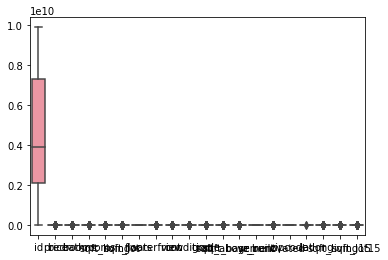

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
sns.boxplot(data = house_data_wod[numerical_columns])
plt.show()
house_data_wod

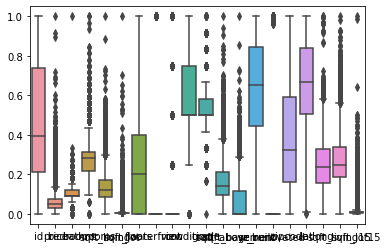

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.026467,20140521T000000,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,...,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986
21609,0.666639,20150223T000000,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,...,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523
21610,0.153783,20140623T000000,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,...,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558
21611,0.029327,20150116T000000,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,...,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731


In [7]:
scaler = preprocessing.MinMaxScaler()
house_data_wod[numerical_columns] = scaler.fit_transform(house_data_wod[numerical_columns])
sns.boxplot(data=house_data_wod[numerical_columns])
plt.show()
house_data_wod

**4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;**

In [8]:
lb_make = LabelEncoder()
house_data_wod[categorical_columns] = house_data_wod[categorical_columns].astype(str).apply(lb_make.fit_transform)
house_data_new = pd.concat((house_data_wod[categorical_columns].astype(float), house_data_wod[numerical_columns].astype(float)), axis=1)
house_data_new

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,164.0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,220.0,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,290.0,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,220.0,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,283.0,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,19.0,0.026467,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,...,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986
21609,288.0,0.666639,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,...,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523
21610,52.0,0.153783,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,...,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558
21611,252.0,0.029327,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,...,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731


**5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;**

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000000,0.005367,-0.004649,-0.016964,-0.034481,-0.034570,0.006361,-0.022395,0.001544,-0.001837,...,-0.040040,-0.027890,-0.019554,-0.000471,-0.024401,0.001376,-0.032851,-0.007205,-0.031653,0.002643
id,0.005367,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.004649,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447


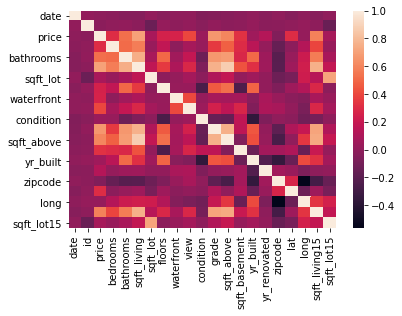

In [9]:
sns.heatmap(house_data_new.corr())
house_data_new.corr().head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.498247,0.693338,0.860373,-0.261461,0.340945,-0.239849,0.814668,0.736883,0.306221,0.178464,-0.056577,0.802966,-0.260813
bedrooms,0.498247,1.000000,0.674154,0.719017,-0.336557,0.253652,-0.204192,0.527433,0.580776,0.334144,0.252426,-0.206008,0.574472,-0.335769
bathrooms,0.693338,0.674154,1.000000,0.892689,-0.318567,0.704229,-0.589617,0.889270,0.874533,0.072191,0.703788,-0.276424,0.813192,-0.312473


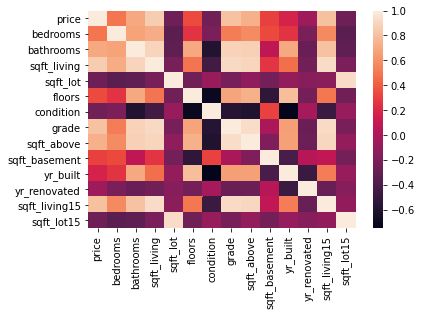

In [10]:
house_matrix = house_data_new.drop(['id', 'date','waterfront','view','zipcode','lat','long'], axis=1).corr()
sns.heatmap(house_matrix.corr())
house_matrix.corr().head(3)

**6.	Заполните пропущенные значения в данных;**

Пропущенных значений нет

**7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.**

Линейная регрессия без использования регуляризаторов

In [11]:
X, y = house_data_new.drop(['price','date'], axis=1), house_data_new['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [12]:
reg = LinearRegression()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

In [13]:
print(pred[:15] - y_test[:15])

5506     0.013991
9279     0.008343
16034    0.020114
6608     0.030803
20359   -0.006204
8798     0.010055
10035   -0.007615
13321    0.025323
15842    0.025256
12119    0.022948
1799    -0.009806
15078   -0.019566
19275   -0.017742
4699     0.006834
4762    -0.028014
Name: price, dtype: float64


In [14]:
corr = {}
corr['pearson'], pvalue_p = pearsonr(pred, y_test)
corr['spearman'], pvalue_s = spearmanr(pred, y_test)
print('Pearson coefficient: ', corr['pearson'], 'p-value: ', pvalue_p)
print('Spearman coefficient: ', corr['spearman'], 'p-value: ', pvalue_s)

Pearson coefficient:  0.8425341307511114 p-value:  0.0
Spearman coefficient:  0.8575020329534151 p-value:  0.0


Линейная регрессия, LASSO регуляризатор

In [15]:
reg = Lasso(alpha=0.001)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [16]:
print(pred[:15] - y_test[:15])

5506     0.006063
9279     0.007103
16034    0.001504
6608     0.005269
20359    0.015052
8798     0.016000
10035   -0.000997
13321    0.025792
15842    0.020952
12119    0.018366
1799    -0.001368
15078   -0.020646
19275   -0.026814
4699    -0.034730
4762    -0.100844
Name: price, dtype: float64


In [17]:
corr['pearson'], pvalue_p = pearsonr(pred, y_test)
corr['spearman'], pvalue_s = spearmanr(pred, y_test)
print('Pearson coefficient: ', corr['pearson'], 'p-value: ', pvalue_p)
print('Spearman coefficient: ', corr['spearman'], 'p-value: ', pvalue_s)

Pearson coefficient:  0.7826203182421835 p-value:  0.0
Spearman coefficient:  0.8296413154980512 p-value:  0.0
